In [10]:
cd ~/work/home/feser/work/ocaml-workspace/staged-synth/runs/2022-07-03-18:12:04/

/home/jovyan/work/mnt/scratch/metric-synth-runs/2022-07-03-18:12:04


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from shared import load, plot_ablations, method_table, construct_table

plt.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.preamble": "\n".join(
            [r"\documentclass[acmsmall,review,timestamp]{acmart}"]
        ),
    }
)

In [12]:
df = load('.')

100%|████████████████████████████████████████████████| 343/343 [00:00<00:00, 13399.33it/s]


In [13]:
df.groupby(['n_groups', 'threshold', 'max_cost', 'extract', 'repair', 'rank']).agg({'success':['mean','count'], 
                                                       'runtime':['min', 'median', 'max'],
                                                       'program_size':['min', 'median', 'max']})

success         runtime  \
                                                      mean count       min   
n_groups threshold max_cost extract repair rank                              
100      0.0       40       Greedy  Guided True   0.500000    34  2.398896   
         0.4       40       Greedy  Guided False  0.000000    34       NaN   
                                           True   0.558824    34  1.593451   
                                    Random True   0.558824    34  1.669321   
                            Random  Guided True   0.558824    34  1.652972   

                                                                        \
                                                    median         max   
n_groups threshold max_cost extract repair rank                          
100      0.0       40       Greedy  Guided True   7.279452   55.742834   
         0.4       40       Greedy  Guided False       NaN         NaN   
                                           True   9.103486  170.362624   
                                    Random True   9.228173  171.761473   
                            Random  Guided True   9.204709  170.050389   

                                                 program_size               
                                                          min median   max  
n_groups threshold max_cost extract repair rank                             
100      0.0       40       Greedy  Guided True          12.0   17.0  34.0  
         0.4       40       Greedy  Guided False          NaN    NaN   NaN  
                                           True          12.0   20.0  37.0  
                                    Random True          12.0   20.0  37.0  
                            Random  Guided True          12.0   20.0  37.0

In [5]:
n_bench = 34

<Figure size 432x288 with 0 Axes>

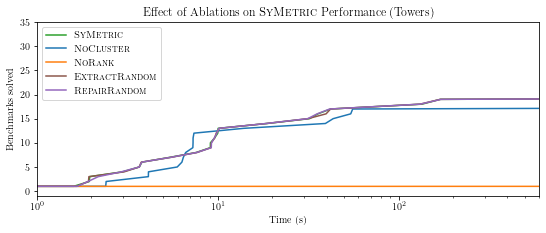

In [14]:
ax = plot_ablations(df)
ax.set_title(r"Effect of Ablations on \textsc{SyMetric} Performance (Towers)")
ax.set_ylim([-1, n_bench + 1])
ax.set_xlim([1e0, 600])
ax.set_xscale("log")
plt.legend(loc="upper left")
plt.savefig('/home/jovyan/work/home/feser/metric_synth/towers_ablation.pdf', bbox_inches="tight")

In [15]:
with open('/home/jovyan/work/home/feser/metric_synth/towers_method_times.tex', 'w') as f:
    method_table(df, file=f)
with open('/home/jovyan/work/home/feser/metric_synth/towers_construct_times.tex', 'w') as f:
    construct_table(df, file=f)

/home/jovyan/work/home/feser/work/ocaml-workspace/staged-synth/notebooks/shared.py:191: FutureWarning: ['method', 'bench', 'filename', 'extract', 'repair'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = df[df["success"]].agg(["median", "max"])
/home/jovyan/work/home/feser/work/ocaml-workspace/staged-synth/notebooks/shared.py:218: FutureWarning: ['method', 'bench', 'filename', 'extract', 'repair'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = df[df["success"]].agg(["median", "max"])


In [9]:
df

,method,bench,max_cost,n_groups,threshold,success,runtime,program_size,timeout,local_search_steps,...,backward_pass_repeats,extract,repair,rank,repair_time,xfta_time,cluster_time,extract_time,rank_time,expansion_time
44,metric,test0.sexp,40,100,0.4,True,6.061898,13.0,0.0,100,...,10,Greedy,Guided,True,0.0,0.0,0.416365,0.0,0.006119,2.806138
49,metric,test0.sexp,40,100,0.4,False,NaN,NaN,1.0,100,...,10,Greedy,Guided,False,0.0,0.0,0.937903,0.0,0.000000,0.000200
78,metric,test0.sexp,40,100,0.4,True,5.807236,13.0,0.0,100,...,10,Random,Guided,True,0.0,0.0,0.355066,0.0,0.005897,2.765081
80,metric,test0.sexp,40,100,0.0,True,13.924982,15.0,0.0,100,...,10,Greedy,Guided,True,0.0,0.0,0.008149,0.0,0.000587,7.084820
151,metric,test0.sexp,40,100,0.4,True,2.187748,13.0,0.0,100,...,10,Greedy,Random,True,0.0,0.0,0.217778,0.0,0.005996,0.948018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,metric,test9.sexp,40,100,0.4,True,3.619798,15.0,0.0,100,...,10,Random,Guided,True,0.0,0.0,0.317599,0.0,0.005392,1.711752
42,metric,test9.sexp,40,100,0.4,False,NaN,NaN,1.0,100,...,10,Greedy,Guided,False,0.0,0.0,0.465222,0.0,0.000000,0.000838
95,metric,test9.sexp,40,100,0.4,True,3.531679,15.0,0.0,100,...,10,Greedy,Guided,True,0.0,0.0,0.316977,0.0,0.005540,1.650065
96,metric,test9.sexp,40,100,0.4,True,3.589327,15.0,0.0,100,...,10,Greedy,Random,True,0.0,0.0,0.318941,0.0,0.006576,1.701823
